# Exploratory Data Analysis (EDA)

In this notebook, I explore the cleaned review dataset to understand its structure, distributions, and potential modeling challenges.

I’ll analyze review lengths, rating distributions, brand and category frequencies, and temporal patterns. These insights will guide my feature engineering and help me anticipate issues like class imbalance or noisy data.

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load cleaned dataset
df = pd.read_parquet("/content/cleaned_reviews.parquet")

In [ ]:
# Basic info
print(" Dataset shape:", df.shape)

 Dataset shape: (9480, 28)


In [ ]:
print("\n Column types:")
print(df.dtypes)


 Column types:
id                                     object
brand                                  object
categories                             object
dateAdded                 datetime64[ns, UTC]
dateUpdated               datetime64[ns, UTC]
keys                                   object
manufacturer                           object
manufacturerNumber                     object
name                                   object
reviews.date              datetime64[ns, UTC]
reviews.dateAdded         datetime64[ns, UTC]
reviews.dateSeen          datetime64[ns, UTC]
reviews.numHelpful                    float64
reviews.rating                          int64
reviews.sourceURLs                     object
reviews.text                           object
reviews.title                          object
reviews.username                       object
upc                                    object
purchase_missing_flag                   int64
purchase_status                        object
purchase_encoded  

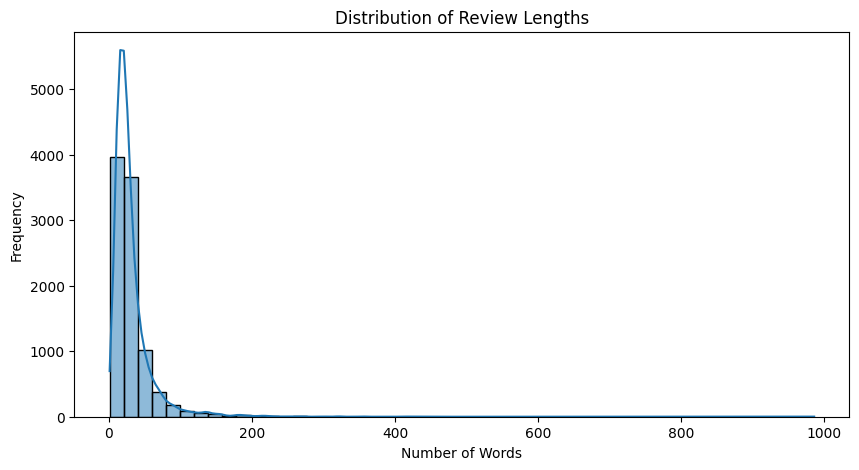

In [ ]:
# Review length analysis
df['review_length'] = df['reviews.text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

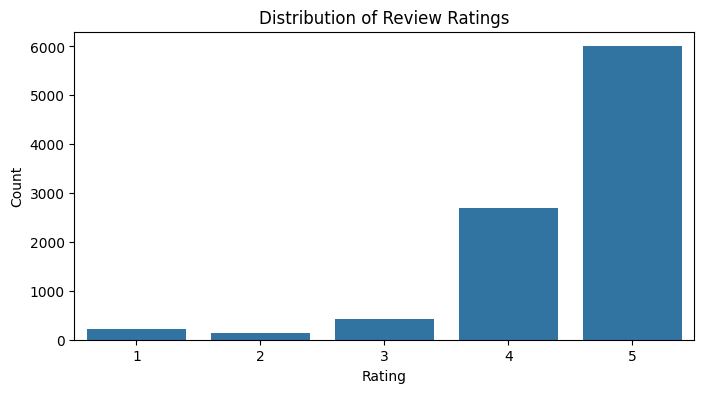

In [ ]:
# Rating distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='reviews.rating', data=df)
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

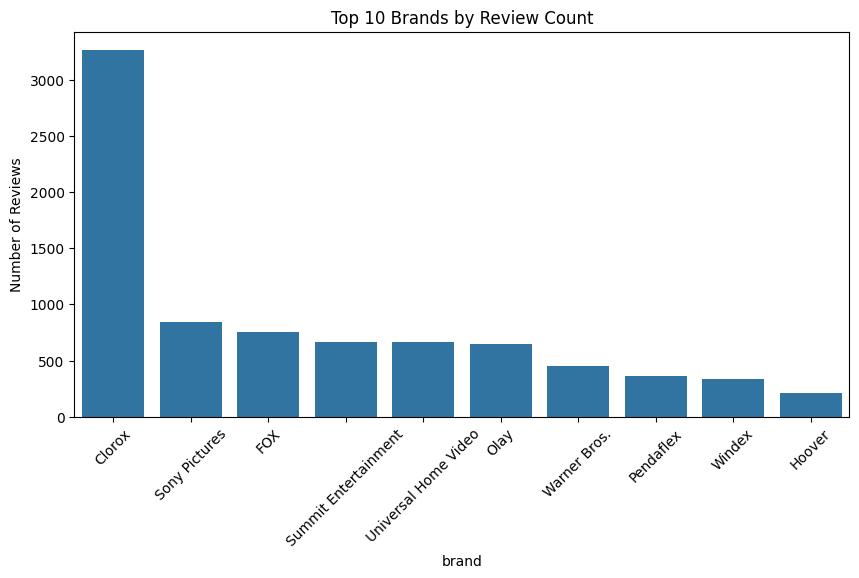

In [ ]:
# Brand frequency
top_brands = df['brand'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Brands by Review Count")
plt.xticks(rotation=45)
plt.ylabel("Number of Reviews")
plt.show()

/tmp/ipython-input-511310805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")
/tmp/ipython-input-511310805.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


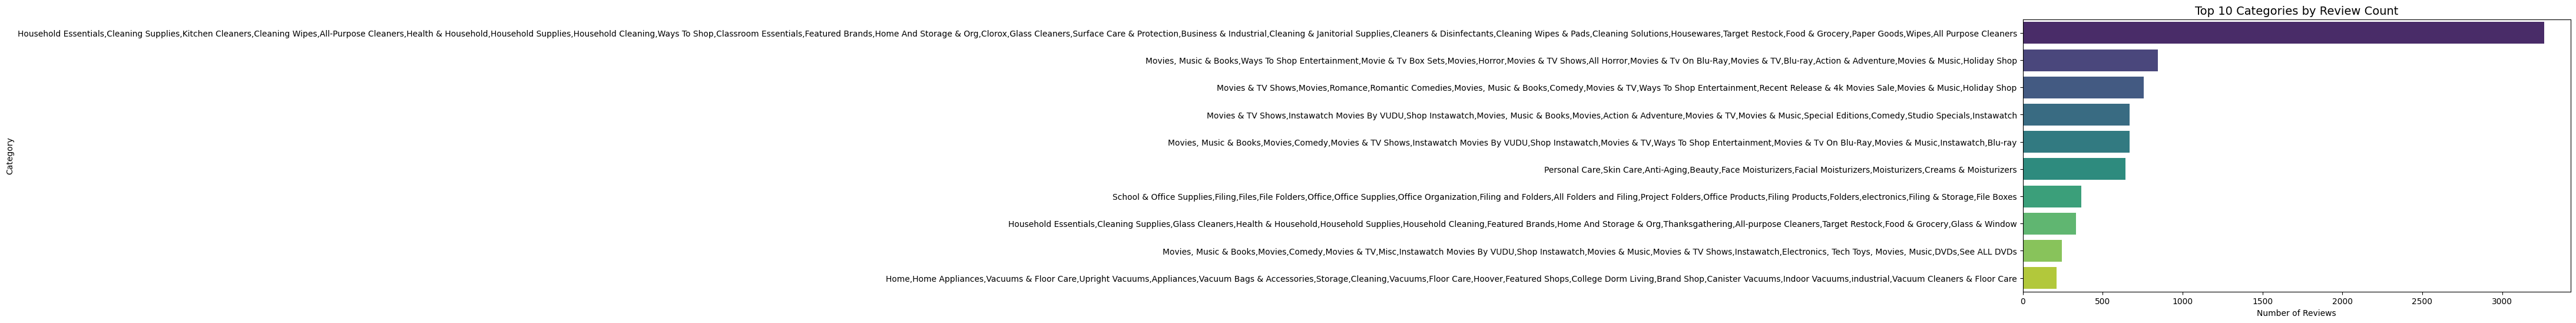

In [ ]:
# Category frequency

top_categories = df['categories'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")
plt.title("Top 10 Categories by Review Count", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# working on category_cleaning.ipynb

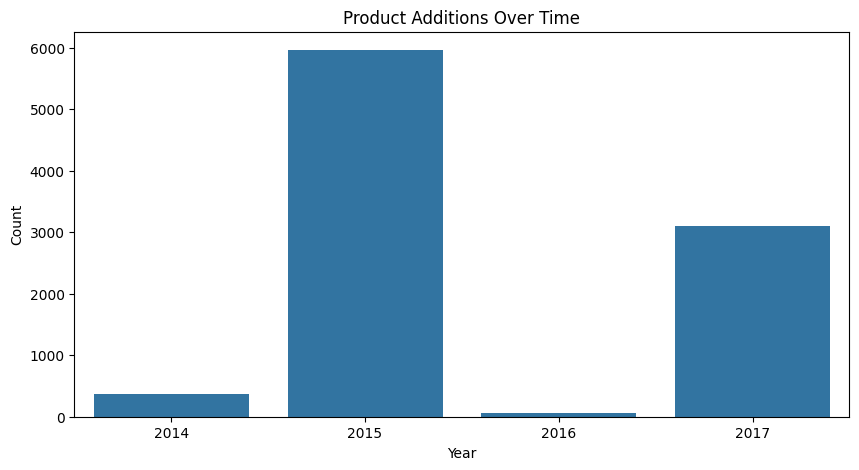

In [ ]:
# Temporal analysis
df['year_added'] = df['dateAdded'].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(x='year_added', data=df)
plt.title("Product Additions Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

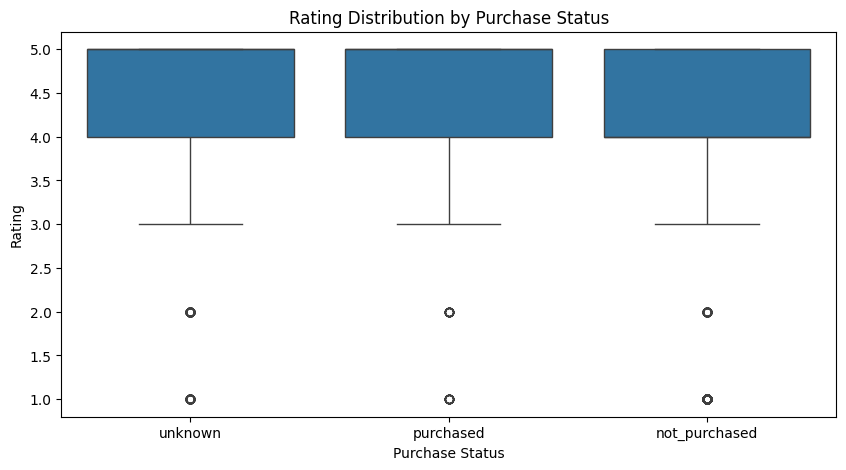

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='purchase_status', y='reviews.rating', data=df)
plt.title("Rating Distribution by Purchase Status")
plt.xlabel("Purchase Status")
plt.ylabel("Rating")
plt.show()

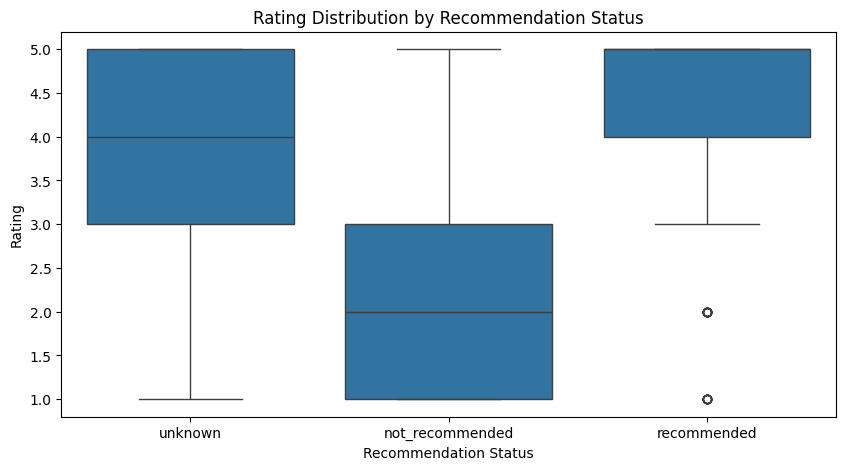

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='recommend_status', y='reviews.rating', data=df)
plt.title("Rating Distribution by Recommendation Status")
plt.xlabel("Recommendation Status")
plt.ylabel("Rating")
plt.show()

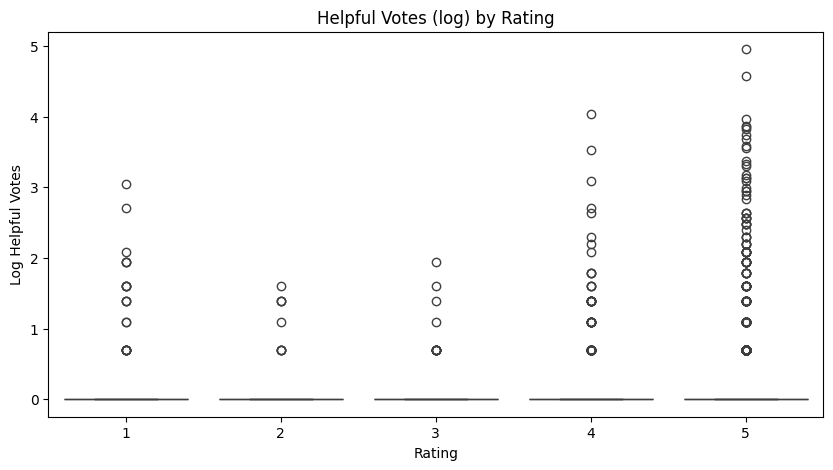

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='reviews.rating', y='log_helpful', data=df)
plt.title("Helpful Votes (log) by Rating")
plt.xlabel("Rating")
plt.ylabel("Log Helpful Votes")
plt.show()

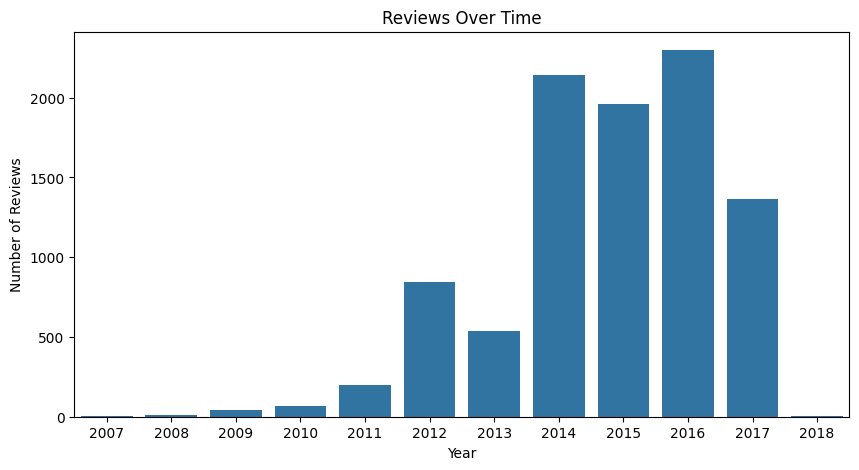

In [ ]:
df['year_review'] = df['reviews.date'].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(x='year_review', data=df, order=sorted(df['year_review'].dropna().unique()))
plt.title("Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

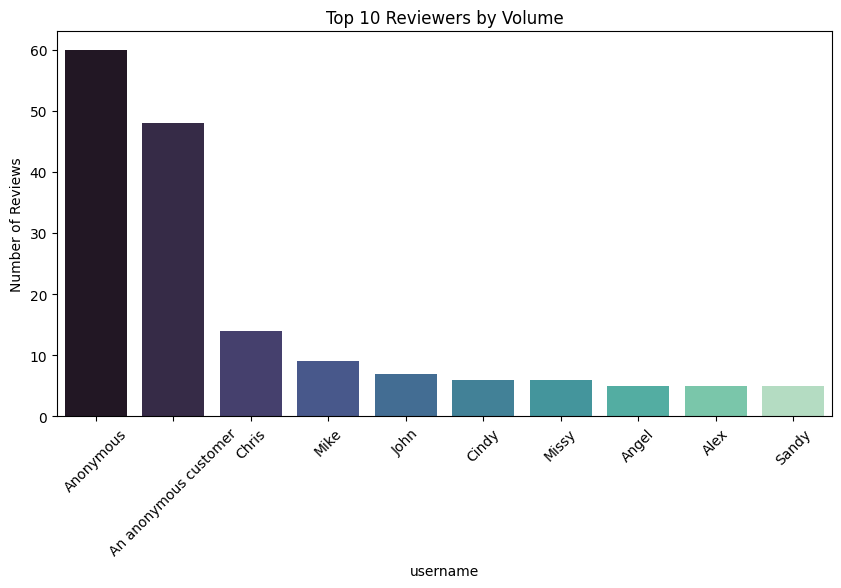

In [ ]:
top_users_df = pd.DataFrame({
    'username': top_users.index,
    'review_count': top_users.values
})

plt.figure(figsize=(10, 5))
sns.barplot(data=top_users_df, x='username', y='review_count', hue='username', palette='mako', dodge=False)
plt.title("Top 10 Reviewers by Volume")
plt.xticks(rotation=45)
plt.ylabel("Number of Reviews")
plt.legend([],[], frameon=False)
plt.show()

In [ ]:
# Duplicated review text analysis
print(f"\n Duplicated review texts: {df.duplicated(subset='reviews.text').sum()}")


 Duplicated review texts: 0


In [ ]:
# Missing values (still present)
print("\n Remaining missing values:")
print(df.isnull().sum())


 Remaining missing values:
id                        0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
keys                      0
manufacturer              0
manufacturerNumber        0
name                      0
reviews.date              0
reviews.dateAdded         0
reviews.dateSeen          0
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title             0
reviews.username          0
upc                       0
purchase_missing_flag     0
purchase_status           0
purchase_encoded          0
recommend_missing_flag    0
recommend_status          0
recommend_encoded         0
helpful_missing_flag      0
no_helpful_votes_flag     0
log_helpful               0
review_length             0
year_added                0
dtype: int64
